In [188]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
revenues_2021 = pd.read_csv('./2021_revenues.csv', header=None)
m_revenues = pd.read_csv('./marketeer_revenues.csv', header=None)
m_lvl_prob = pd.read_csv('./marketeer_level_prob.csv', header=None)
m_capacity_decision = pd.read_csv('./marketer_capacity_decision.csv', header=None)

In [54]:
# reshape the vector to have the same shape of the required array for the six years
m_revenues = np.array(m_revenues).reshape(8 ,3, 6)
m_revenues

array([[[7393, 5395, 2000, 7943, 2489, 7138],
        [3884, 6947, 5005, 2340, 5722, 2500],
        [5875, 6887, 6886, 6376, 5746, 5026]],

       [[3808, 7575, 2895, 5088, 5314, 4970],
        [5147, 4543, 5806, 6231, 2949, 6977],
        [3207, 5089, 5041, 7227, 3231, 7292]],

       [[5408, 3006, 3163, 7681, 5499, 2045],
        [6387, 2071, 6598, 4951, 6254, 5376],
        [2779, 6361, 5796, 6520, 5184, 4047]],

       [[2181, 7554, 2675, 7312, 7436, 3795],
        [7343, 7177, 5991, 3592, 2157, 5297],
        [6551, 4564, 7081, 7600, 3971, 7210]],

       [[5820, 6271, 5180, 7041, 5306, 4947],
        [3536, 2478, 5011, 7256, 4681, 4364],
        [6714, 4198, 5337, 7468, 4781, 6669]],

       [[4695, 6978, 2783, 3306, 4014, 3795],
        [6965, 4800, 2565, 2401, 5126, 4884],
        [6713, 4583, 5705, 2047, 4565, 3672]],

       [[7320, 6005, 7550, 2061, 4116, 5946],
        [3902, 2759, 3274, 3043, 2520, 6465],
        [5037, 6955, 5534, 4886, 5695, 6468]],

       [[6071, 3310,

In [55]:
# Split the probability array for the 8 years.
m_lvl_prob = np.array(m_lvl_prob).reshape(8, 6)
m_lvl_prob

array([[0.24576477, 0.24154581, 0.13299161, 0.05851051, 0.14789063,
        0.17329667],
       [0.11530339, 0.0323602 , 0.04184019, 0.17041022, 0.3287662 ,
        0.3113198 ],
       [0.45585421, 0.21272441, 0.10848857, 0.00140342, 0.04105573,
        0.18047366],
       [0.07902593, 0.07656787, 0.13680146, 0.16901634, 0.25846189,
        0.28012649],
       [0.18774931, 0.2462164 , 0.1630849 , 0.14419076, 0.0606472 ,
        0.19811144],
       [0.46036776, 0.00427948, 0.17563501, 0.29145957, 0.04676519,
        0.021493  ],
       [0.01138155, 0.14836236, 0.33008233, 0.1400916 , 0.06173792,
        0.30834424],
       [0.41855265, 0.0805915 , 0.12690114, 0.12182171, 0.22560791,
        0.02652509]])

In [56]:
m_capacity_decision = np.array(m_capacity_decision)
m_capacity_decision

array([[2013,    1],
       [2014,    1],
       [2015,    3],
       [2016,    2],
       [2017,    1],
       [2018,    1],
       [2019,    2],
       [2020,    3]], dtype=int64)

In [107]:
# Business decisions
business_decisions = []
for i in range(len(m_capacity_decision)):
    business_decisions.append(m_capacity_decision[i][1])
    
business_decisions

[1, 1, 3, 2, 1, 1, 2, 3]

# 1.a. Expected Opportunity Loss - EOL

In [57]:
# find max element in each column in the matrix for the first year
m_revenues[0].max(axis=0)

array([7393, 6947, 6886, 7943, 5746, 7138], dtype=int64)

In [58]:
# payoff matrix for the first year
m_revenues[0]

array([[7393, 5395, 2000, 7943, 2489, 7138],
       [3884, 6947, 5005, 2340, 5722, 2500],
       [5875, 6887, 6886, 6376, 5746, 5026]], dtype=int64)

In [59]:
# Year 1 regret matrix
regret_mat = m_revenues[0].max(axis=0) - m_revenues[0]
regret_mat

array([[   0, 1552, 4886,    0, 3257,    0],
       [3509,    0, 1881, 5603,   24, 4638],
       [1518,   60,    0, 1567,    0, 2112]], dtype=int64)

In [60]:
# Calculate regret for year 1
EOL = np.dot(regret_mat, m_lvl_prob[0])
EOL

array([1506.35588339, 2247.67953198,  845.25221067])

In [61]:
# get the minimum OL 
EOL.min()

845.2522106745994

In [62]:
# get the lowest OL decision
EOL.argmin()+1

3

In [100]:
# making it a function
def calc_EOL(revenues, prob):
    # year regret matrix
    regret_mat = revenues.max(axis=0) - revenues
    # Calculate regret 
    EOL = np.dot(regret_mat, prob)
    
    return EOL

In [102]:
# find regret for all years
EOL_per_year = []
for i in range(len(m_revenues)):
    EOL_per_year.append(calc_EOL(m_revenues[i], m_lvl_prob[i]))
    
EOL_per_year

[array([1506.35588339, 2247.67953198,  845.25221067]),
 array([1363.58007962, 1143.44249307, 1020.96376585]),
 array([2164.7847467 ,  916.41906328, 2017.13831639]),
 array([2015.98780702, 2755.69950946, 1187.09693806]),
 array([ 596.16956028, 2108.85159086,  542.24637107]),
 array([1633.64908322,  824.58555038,  545.49439881]),
 array([ 795.14289068, 2527.99437713,  691.43003996]),
 array([1680.28922826,  942.06071475, 1218.34755347])]

In [176]:
# return the decisions taken for each year
EOL_decision = []
for i in range(len(EOL_per_year)):
    EOL_decision.append(EOL_per_year[i].argmin()+1)
    
EOL_decision

[3, 3, 2, 3, 3, 3, 3, 2]

<AxesSubplot:ylabel='Frequency'>

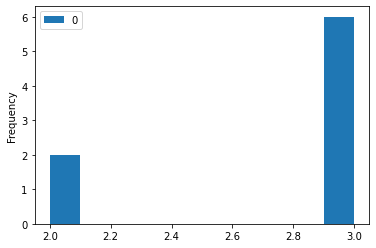

In [177]:
EOL_decision_df = pd.DataFrame(EOL_decision)
EOL_decision_df.plot.hist()

In [108]:
business_decisions

[1, 1, 3, 2, 1, 1, 2, 3]

We can notice that business lost money in first, third, fifth and eighth year.  
Our decision based on EOL could have saved much money for the business.

==================================================================================================================

# 1.b Expected Monetary Value -  EMV 

Multiply the probabiliy of the year in the payoff matrix

In [64]:
# Prob for first year(2013)
print(m_lvl_prob[0], '\n')
# Matrix for first year(2013)
print(m_revenues[0])

[0.24576477 0.24154581 0.13299161 0.05851051 0.14789063 0.17329667] 

[[7393 5395 2000 7943 2489 7138]
 [3884 6947 5005 2340 5722 2500]
 [5875 6887 6886 6376 5746 5026]]


In [65]:
# multiply i-th element in i-th column
EMV = np.dot(m_revenues[0], m_lvl_prob[0])
EMV

array([5455.90220812, 4714.57855954, 6117.00588084])

In [66]:
def calc_EMV(prob, revenues):
    # multiply i-th element in i-th column
    EMV = np.dot(revenues, prob)
    return EMV

##### EMV per year

In [67]:
EMV_per_year = []
for i in range(len(m_revenues)):
    EMV_per_year.append(calc_EMV(m_lvl_prob[i], m_revenues[i]))
    
EMV_per_year

[array([5455.90220812, 4714.57855954, 6117.00588084]),
 array([4966.70135007, 5186.83893662, 5309.31766385]),
 array([4053.47225525, 5301.83793868, 4201.11868556]),
 array([5337.54336265, 4597.83166021, 6166.43423161]),
 array([5798.60222982, 4285.92019924, 5852.52541903]),
 array([3912.92776853, 4721.99130137, 5001.08245294]),
 array([5842.60740595, 4109.7559195 , 5946.32025667]),
 array([5130.93983598, 5869.16834949, 5592.88151078])]

In [68]:
# return the EMV Payoff for each year
EMV_payoff = []
for i in range(len(EMV_per_year)):
    EMV_payoff.append(EMV_per_year[i].max())

EMV_payoff

[6117.005880838689,
 5309.317663847139,
 5301.837938675208,
 6166.434231611513,
 5852.525419026457,
 5001.082452938969,
 5946.320256672174,
 5869.168349492563]

In [69]:
# return the decisions taken for each year
EMV_decision = []
for i in range(len(EMV_per_year)):
    EMV_decision.append(EMV_per_year[i].argmax()+1)
    
EMV_decision

[3, 3, 2, 3, 3, 3, 3, 2]

<AxesSubplot:ylabel='Frequency'>

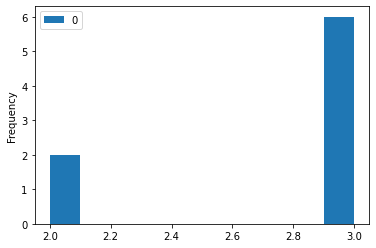

In [172]:
EMV_decision_df = pd.DataFrame(EMV_decision)
EMV_decision_df.plot.hist()

In [109]:
business_decisions

[1, 1, 3, 2, 1, 1, 2, 3]

In [95]:
# Business payoff
business_payoff = []
for i in range(len(EMV_per_year)):
    business_payoff.append(EMV_per_year[i][business_decisions[i]-1])
    
business_payoff

[5455.902208121184,
 4966.70135007345,
 4201.118685558187,
 4597.831660210599,
 5798.602229821516,
 3912.927768526715,
 4109.755919500261,
 5592.881510777901]

In [72]:
# EMV_payoff - business_payoff
difference = []

zip_object = zip(EMV_payoff, business_payoff)
for list1_i, list2_i in zip_object:
    difference.append(list2_i-list1_i)
    
difference_df = pd.DataFrame(difference).T
difference_df.columns = ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'] 
 
difference_df

,2013,2014,2015,2016,2017,2018,2019,2020
0,-661.103673,-342.616314,-1100.719253,-1568.602571,-53.923189,-1088.154684,-1836.564337,-276.286839


The analysis of shows that The business tool the wrong decison every year. 
we recommend following the EMV Solution to achieve better results.

# 2.a. The Very Optimistic Decision Maker 

Apply the Maxi-Max method to get revenues and Action

In [132]:
# get maxi-max revenue for first year
m_revenues[0].max(axis=1).max()

7943

In [134]:
maxi_max_values = []
maxi_max_decisions = []
for i in range(len(m_revenues)):
    maxi_max_values.append(m_revenues[i].max(axis=1).max())
    
    # get maxi-max decision for first year
    maxi_max_decisions.append(m_revenues[i].max(axis=1).argmax()+1)

maxi_max_list

[7943, 7575, 7681, 7600, 7468, 6978, 7550, 7969]

In [179]:
# Maxi_Max - business_payoff
difference = []

zip_object = zip(maxi_max_list, business_payoff)
for list1_i, list2_i in zip_object:
    difference.append(list2_i-list1_i)
    
difference_df = pd.DataFrame(difference).T
difference_df.columns = ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'] 
 
difference_df

,2013,2014,2015,2016,2017,2018,2019,2020
0,-2487.097792,-2608.29865,-3479.881314,-3002.16834,-1669.39777,-3065.072231,-3440.24408,-2376.118489


In [135]:
maxi_max_decisions

[1, 1, 1, 3, 3, 1, 1, 3]

<AxesSubplot:ylabel='Frequency'>

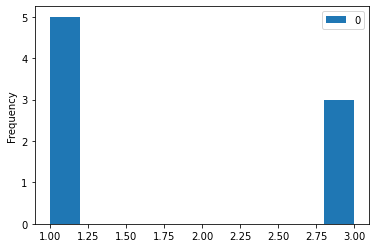

In [173]:
maxi_max_decision_df = pd.DataFrame(maxi_max_decisions)
maxi_max_decision_df.plot.hist()

# 2.a. The Very Pessimistic Decision Maker 

In [126]:
# get maxi-max revenue for first year
m_revenues[0].min(axis=1).min()

2000

In [128]:
# get maxi-max decision for first year
m_revenues[0].min(axis=1).argmin()+1

1

In [137]:
maxi_min_values = []
maxi_min_decisions = []
for i in range(len(m_revenues)):
    maxi_min_values.append(m_revenues[i].min(axis=1).min())
    
    # get maxi-max decision for first year
    maxi_min_decisions.append(m_revenues[i].min(axis=1).argmin()+1)

maxi_min_values

[2000, 2895, 2045, 2157, 2478, 2047, 2061, 2304]

In [180]:
# Maxi_Max - business_payoff
difference = []

zip_object = zip(maxi_min_values, business_payoff)
for list1_i, list2_i in zip_object:
    difference.append(list2_i-list1_i)
    
difference_df = pd.DataFrame(difference).T
difference_df.columns = ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'] 
 
difference_df

,2013,2014,2015,2016,2017,2018,2019,2020
0,3455.902208,2071.70135,2156.118686,2440.83166,3320.60223,1865.927769,2048.75592,3288.881511


In [174]:
maxi_min_decisions

[1, 1, 1, 2, 2, 3, 1, 1]

<AxesSubplot:ylabel='Frequency'>

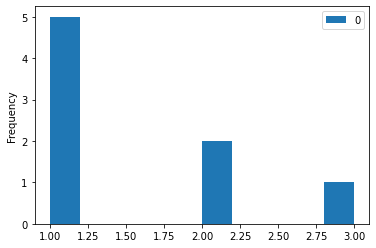

In [175]:
maxi_min_decision_df = pd.DataFrame(maxi_min_decisions)
maxi_min_decision_df.plot.hist()

# Sensitivity Analysis

In [184]:
revenues_2021 = np.array(revenues_2021).reshape(3, 6)
revenues_2021

array([[9240, 7941, 5260, 7163, 6172, 7803],
       [8570, 9116, 8273, 8943, 7186, 9985],
       [7173, 7598, 5474, 6573, 6873, 8024]], dtype=int64)

In [187]:
p_2021 = m_lvl_prob[7]
p_2021

array([0.41855265, 0.0805915 , 0.12690114, 0.12182171, 0.22560791,
       0.02652509])

In [190]:
emv_2021 = calc_EMV(p_2021, revenues_2021)
emv_2021

array([7646.9397993 , 8347.04448053, 6873.44380662])

[array([7646.9397993, 7646.9397993, 7646.9397993, 7646.9397993,
        7646.9397993, 7646.9397993]),
 array([8347.04448053, 8347.04448053, 8347.04448053, 8347.04448053,
        8347.04448053, 8347.04448053]),
 array([6873.44380662, 6873.44380662, 6873.44380662, 6873.44380662,
        6873.44380662, 6873.44380662])]

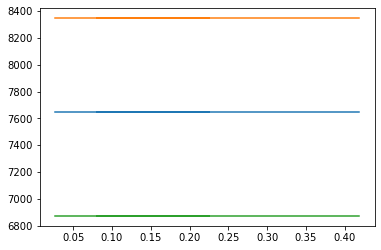

In [204]:
s_analysis = []
for i in range(3):
    s_analysis.append(emv_2021[i] * p_2021 + emv_2021[i] * (1-p_2021))
    plt.plot(p_2021, s_analysis[i])
s_analysis

ValueError: x and y must have same first dimension, but have shapes (6,) and (3, 6)

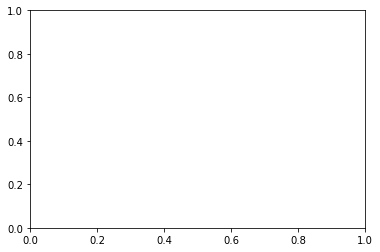